In [1]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Исходные данные: x - расходы на рекламу, Y - объемы продаж
x = np.array([39, 36, 60, 21, 27, 12, 51, 57, 54, 42, 18, 9, 48, 66, 6, 30, 24, 33, 15, 21]).reshape(20, 1)
Y = np.array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]).reshape(20, 1)
display(x, Y)


array([[39],
       [36],
       [60],
       [21],
       [27],
       [12],
       [51],
       [57],
       [54],
       [42],
       [18],
       [ 9],
       [48],
       [66],
       [ 6],
       [30],
       [24],
       [33],
       [15],
       [21]])

array([[1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

Реализовать класс модели логистической регрессии с использованием:
а) максимизации логарифмического правдоподобия методом градиентного подъема
б) минимизации функции потерь (кросс-энтропии) методом градиентного спуска

Сравнить результаты (время исполнения и достигнутые значения accuracy и f1) в случаях а и б при одном и том же числе шагов и скорости обучения.



In [3]:
#Реализуем цикл градиентного спуска
class LogisticRegressionGD(object):
    def __init__(self):
        self.a = None
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    def predict(self, x):
        return self.sigmoid(np.matmul(x , self.a))
    def coefs(self):
        return self.a
    def LogLikelihood(self, x, Y):
        return (np.matmul(np.transpose(Y), np.log(self.predict(x) + 1e-8)) + np.matmul(np.ones((1, Y.shape[0])) - np.transpose(Y),
                                                                                      np.log(np.ones((Y.shape[0], 1)) - self.predict(x) + 1e-8)))[0][0]
    def CrossEntropy(self, x, Y):
        return (np.matmul(np.transpose(Y), np.log(self.predict(x) + 1e-8)) - np.matmul(np.ones((1, Y.shape[0])) - np.transpose(Y),
                                                                                      np.log(np.ones((Y.shape[0], 1)) - self.predict(x) + 1e-8)))[0][0]    
    def accuracy(self, x, Y):
        return (Y == self.predict(x)).mean()
    
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.001, max_steps = 5000, Rtype = "LL"):
        self.a = np.zeros(x.shape[1]).reshape(x.shape[1],1)
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            if Rtype == "LL":
                new_error = self.LogLikelihood(x, Y)
                dT_a = np.matmul(np.transpose(x), Y - self.predict(x))
                #display("old a = ",self.a, "new_error = ", new_error, "dT_a = ", dT_a)
                self.a += alpha*dT_a
                #display("new a = ",self.a)
            elif Rtype == "CE":
                new_error = self.CrossEntropy(x, Y)
                dT_a = -np.matmul(np.transpose(x), Y - self.predict(x))
                #display("old a = ", self.a, "new_error = ", new_error, "dT_a = ", dT_a)
                self.a -= alpha*dT_a
                #display("new a = ",self.a)
            step += 1
            steps.append(step)
            errors.append(new_error)
            #print(step, new_error)
            if abs(new_error) < epsylon:
                break
        return steps, errors

In [4]:
x_ = x.copy()
import time

intercept = np.ones((x.shape[0], 1))
x_ = np.concatenate((intercept, x), axis = 1)


In [5]:
start_time = time.time()
regr = LogisticRegressionGD()
steps, errors =  regr.fit(x_, Y, alpha = 0.0005, epsylon = 0.001, max_steps = 20000, Rtype = "LL") 

display('Время обучения: ', time.time() - start_time, 'сек.')

'Время обучения: '

1.0028316974639893

'сек.'

array([[-4.0015722 ],
       [ 0.12327176]])

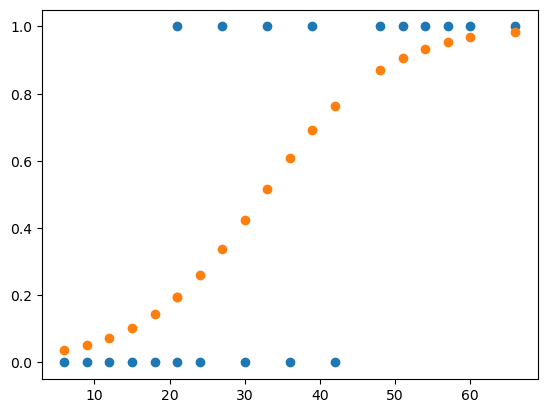

In [6]:
display(regr.coefs())

Y_Pred = regr.predict(x_)



plt.scatter(x, Y)
plt.scatter(x, Y_Pred)




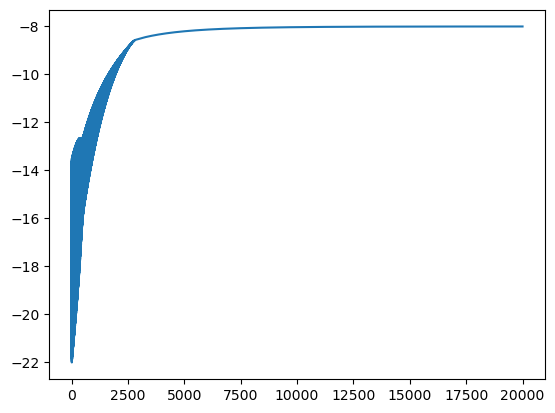

In [7]:
plt.plot(steps, errors)

Реализовать расчеты способами а и б для набора данных из файла insclass_train.csv/
Для 151 406 договоров страхования транспортных средств известны значения ряда признаков, в том числе пол, возраст, стаж вождения и коэффициент бонус-малус водителя, тип, марка, модель, год выпуска, страна – производитель, мощность и объем двигателя, а также признак target, равный 1, если заключение договора с клиентом является рисковым, и 0 в противном случае (файл insclass_train.csv).

Требуется построить модель, предсказывающую значение признака target для 22 624 договоров из тестового набора данных (файл insclass_test.csv).

В обучающем наборе данных для каждого договора известны следующие поля:

variable_1 - агрегированный коэффициент бонус-малус (повышающий или понижающий стоимость полиса в зависимости от аварийности в предыдущие периоды);
variable_2 - индикатор расторжения договора по инициативе страхователя (клиента);
variable_3 - индикатор расторжения договора по инициативе страховщика (страховой компании);
variable_4 - идентификатор года выпуска транспортного средства;
variable_5 - идентификатор страны - производителя транспортного средства;
variable_6 - мощность двигателя в лошадиных силах;
variable_7 - объем двигателя в куб. см;
variable_8 - идентификатор стороны расположения руля (левый или правый);
variable_9 - пробег транспортного средства, покрываемый гарантией производителя;
variable_10 - индикатор действия гарантии на транспортное средство;
variable_11 - "мультидрайв" - индикатор допуска к управлению транспортным средством более одного водителя;
variable_12 - возраст транспортного средства (в мес.);
variable_13 - возраст водителя с максимальным стажем;
variable_14 - коэффициент возраст-стаж;
variable_15 - коэффициент краткосрочности;
variable_16 - коэффициент мощности;
variable_17 - коэффициент "мультидрайв";
variable_18 - территориальный коэффициент;
variable_19 - коэффициент "КНДР";
variable_20 - идентификатор канала продаж;
variable_21 - марка транспортного средства;
variable_22 - модель транспортного средства;
variable_23 - индикатор отечественных транспортных средств;
variable_24 - пол водителя с максимальным коэффициентом "возраст-стаж";
variable_25 - индикатор пролонгации;
variable_26 - индикатор совпадения собственника транспортного средства и водителя;
variable_27 - стаж водителя с максимальным коэффициентом "возраст-стаж";
variable_28 - тип транспортного средства;
target - класс риска, равный 1, если заключение договора с клиентом является рисковым, и 0 в противном случае.